## Data Overview

In [67]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [100]:
github_repo = pd.read_csv('../data/repo_info_stop75.csv', index_col='Unnamed: 0')
topic_rel = pd.read_csv('../data/topic_relationship_table_stop75.csv', index_col='Unnamed: 0')
topic_rel = topic_rel.reset_index(drop=True)

### Plot 1
This is a simple frequency plot to see what the most popular programming languages in general are before grouping by different categories (topic and year). The most used languages are, in order, Python, JavaScript and C++. 

In [105]:
language_frequency = github_repo.groupby('language').size().sort_values(ascending=False)

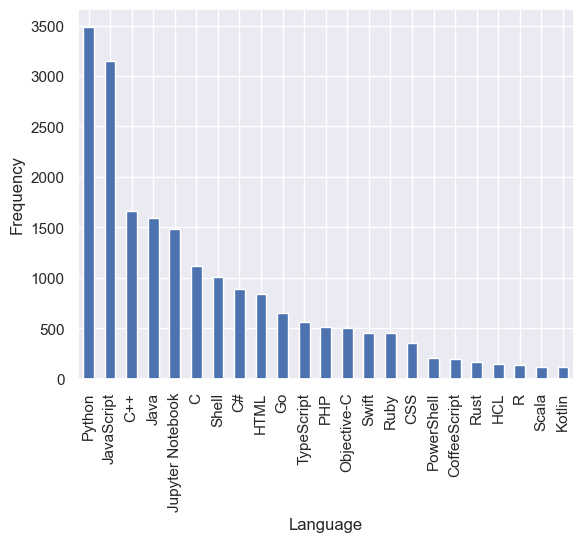

In [156]:
language_frequency[language_frequency>100].plot.bar()
plt.xlabel('Language')
plt.ylabel('Frequency')
plt.show()

In [107]:
# get language for each repo in topic relationship table
topic_rel['language'] = [github_repo.loc[topic_rel.loc[i,'id'],'language'] for i in list(topic_rel.index) if topic_rel.loc[i,'id'] in github_repo.index]

In [108]:
topic_rel = topic_rel.dropna()
github_repo = github_repo.dropna()

In [109]:
!pip install nltk
import nltk

# when scraping some topics copied over the entire list. Remove these topics
topic_rel = topic_rel[topic_rel.topic.str[0] != '[']

stemmer = nltk.stem.porter.PorterStemmer()
def stemming(topic):
    return '-'.join([stemmer.stem(w) for w in topic.split("-")])

#stemming topics to group similar topics such as face recognition and face identification together
topic_rel['topic_simple'] = topic_rel['topic'].apply(stemming)
topic_rel['topic_simple'] = topic_rel['topic_simple'].apply(lambda x : x.split('-')[0])

### Plot 2
This is another frequency plot showing the most popular simplified topics. They are, in order, python, data, deep, machin, android, javascript, hacktoberfest, aw(s), and javascript. 

In [154]:
topic_frequency = topic_rel.dropna().groupby('topic_simple').size().sort_values(ascending=False)

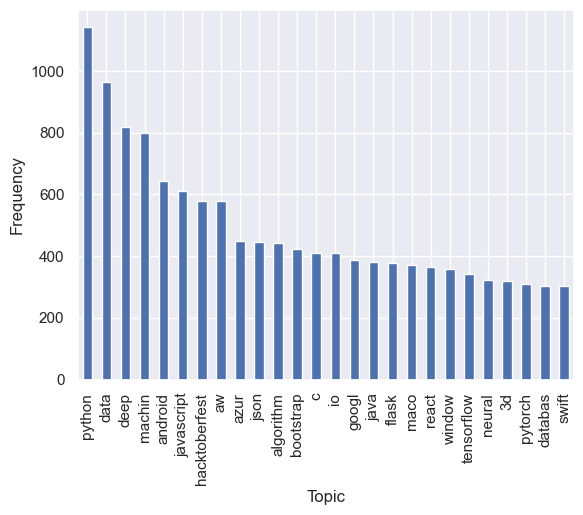

In [155]:
topic_frequency[topic_frequency>300].plot.bar()
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.show()

### Plot 3
The third plot shows distribution of programming languages used by topic. The topic relationship table was first grouped by both topic and language. And then all languages without more than 100 appearances were grouped into 'Other'. Finally counts were normalized to percentages so that we could focus on looking at distribution of languages across topics without being distracted varying heights due to different counts per topic. 

Some information gained is trivial, i.e the most popular language for the topic 'javascript' is JavaScript and similarly for 'python' and 'c'. However we can see that for android, Java is the most popular language and ios, Swift is the most popular language. We can also look at artificial intelligence in general. For topics of deep-learning machine-learning and neural networks Jupyter Notebook and Python are the most popular languages which is probably due to the vast number of ML packages in python like pytorch, tensorflow and sklearn. 

In [164]:
#get list of 25 most common topics
topic_counts = topic_rel.groupby('topic_simple').count().sort_values(by='id',ascending=False)
common_topics = list(topic_counts.index)[:25]

#groupby topic and language and get number of repositories. Creates a matrix number of repos as values, language as columns and topic as rows
language_by_topic = pd.DataFrame(topic_rel[topic_rel['topic_simple'].isin(common_topics)].groupby(['topic_simple', 'language']).size(),columns=['size'])
language_by_topic = language_by_topic['size'].unstack()
language_by_topic = language_by_topic.fillna(0)

# get languages with most total repositories
top_languages = list(language_by_topic.sum().sort_values(ascending=False).index)[:10]

# all other languages will be considered 'Other'
other_languages = [l for l in list(language_by_topic.columns) if l not in top_languages]
language_by_topic['Other'] = language_by_topic[other_languages].sum(axis=1)
language_by_topic_dropped = language_by_topic.drop(columns=other_languages)

#Normalize values by row
language_by_topic_percent = language_by_topic_dropped.apply(lambda x: x*100/sum(x), axis=1)

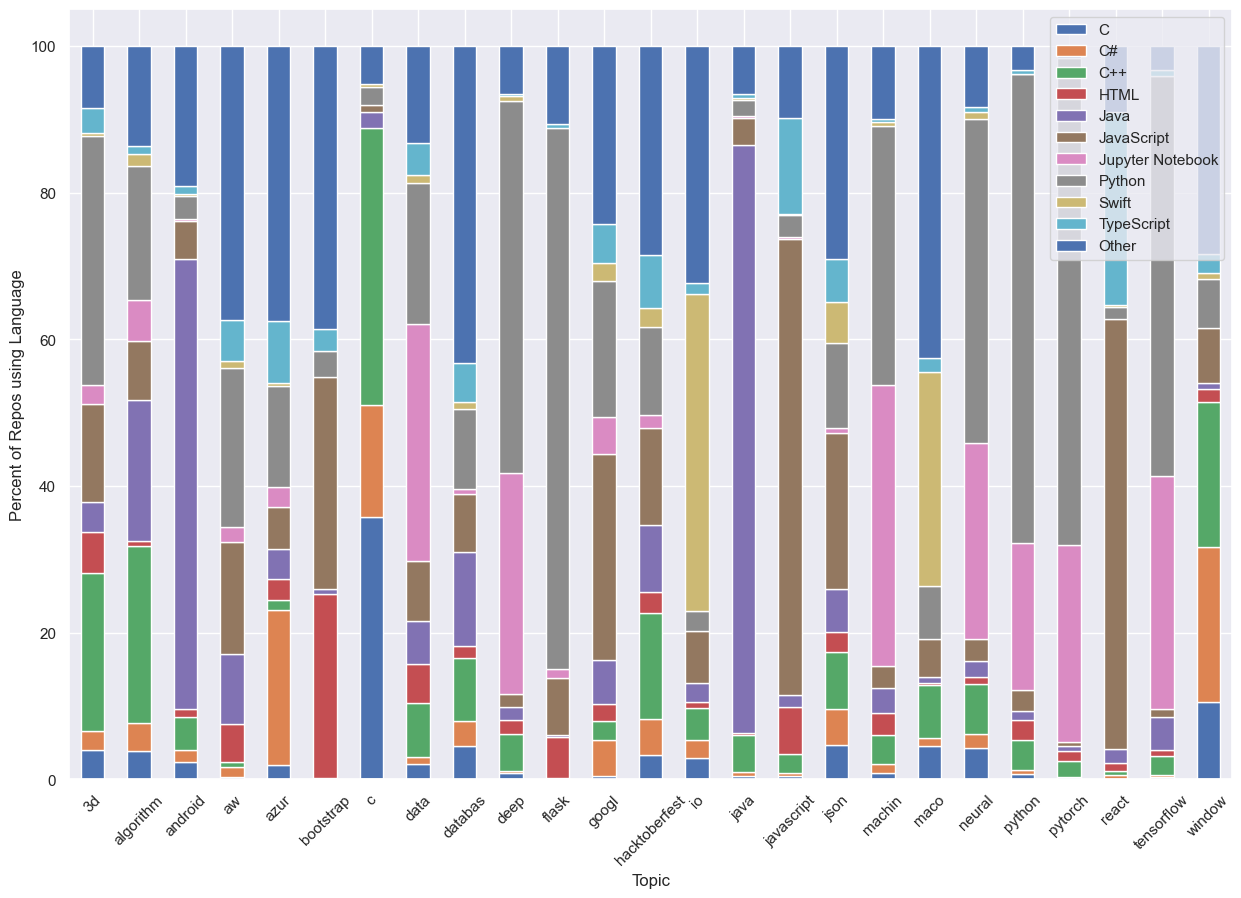

In [165]:
sns.set()
language_by_topic_percent.plot.bar(stacked=True)
plt.gcf().set_size_inches(15,10)
plt.ylabel('Percent of Repos using Language')
plt.xlabel('Topic')
plt.legend()
xt = plt.xticks(rotation=45)
plt.show()

### Plot 4
The fourth plot followed a similar pre-processing method explained above to look at the distribution of programming languages over the years. We can see that jupyter notebook was first used in 2013 and since grown in popularity. Other programming languages that have grown in popularity (usage) over time, though less noticeably include HTML, Python and TypeScript. If we looked when these languages were first released, Jupyter Notebook was released in 2011, HTML5 was released in 2008, HTML6 was released on 2014, Python3 was released in 2008 and TypeScript was released on 2012, all of which are a few years before they can be seen showing up in plot 2. Remember that these repositories are the most popular and best matching repository for 38 different search words, so although they may have been used in repos immediately we don't see their utility (being the main language of popular repositories) until a few years after release.  

In [162]:
#get year created
github_repo['year_created'] = github_repo['created_at'].apply(lambda x: x[:4])


#groupby year created and language and get number of repositories. Creates a matrix number of repos as values, language as columns and year created as rows
#remove repos from 2022 and 2008 because not full years
language_by_year = pd.DataFrame(github_repo_dropped[github_repo_dropped.year_created != '2022'][github_repo_dropped.year_created != '2008'].groupby(['year_created', 'language']).size(),columns=['size'])
language_by_year = language_by_year['size'].unstack()
language_by_year = language_by_year.fillna(0)

# get languages with most total repositories
top_languages = list(language_by_year.sum().sort_values(ascending=False).index)[:10]

# all other languages considered 'Other'
other_languages = [l for l in list(language_by_year.columns) if l not in top_languages]
language_by_year['Other'] = language_by_year[other_languages].sum(axis=1)
language_by_year_dropped = language_by_year.drop(columns=other_languages)
language_by_year_percent = language_by_year_dropped.apply(lambda x: x*100/sum(x), axis=1)

/Users/emmatysinger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/emmatysinger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


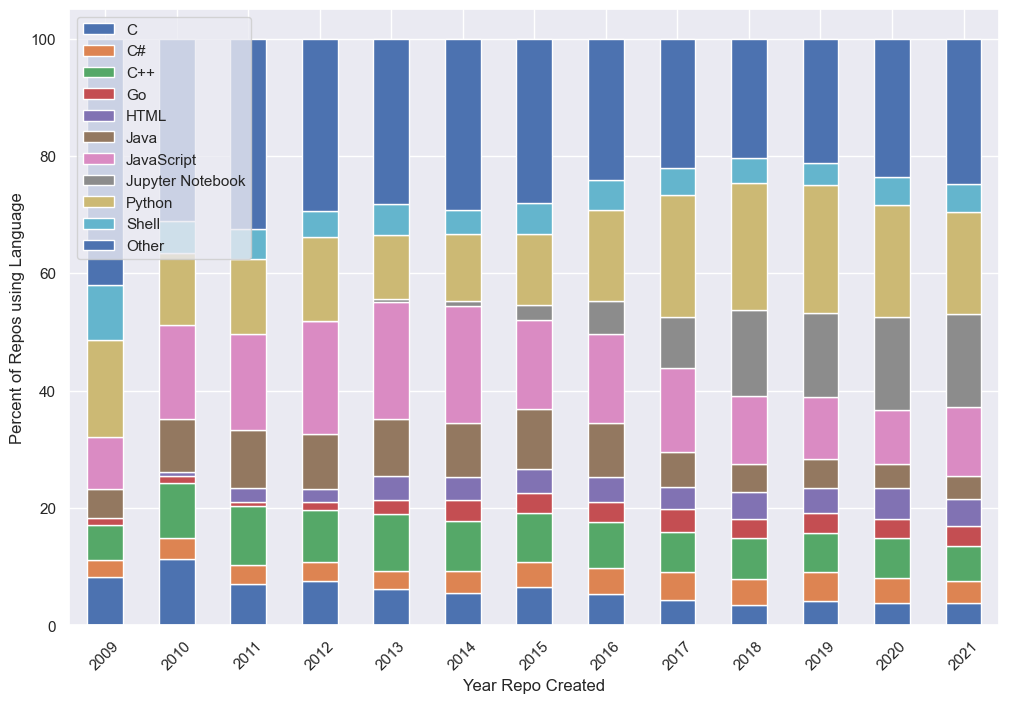

In [163]:
language_by_year_percent.plot.bar(stacked=True)
plt.gcf().set_size_inches(12,8)
xt = plt.xticks(rotation=45)
plt.ylabel('Percent of Repos using Language')
plt.xlabel('Year Repo Created')
plt.legend()
plt.show()

### Plot 5
The fifth plot once again followed a similar pre-processing method and this time we're looking at the distribution of topics over the years. Because there are many topics, even the topic 10 don't make up even 25% of the yearly distribution so for this analysis I removed the 'Other' category. It's hard to gather any trend from the stacked percentage bar plot so I plotted the data on a line plot with each line representing the number of repositories that represent a specific topic for each year. We see that deep, data and machine have the highest peaks so in general the are the most popular across all years but there is no clear change in trending topics from year to year. 

In [166]:
topic_rel['year_created'] = [github_repo.loc[topic_rel.loc[i,'id'],'year_created'] for i in list(topic_rel.index)]

#groupby year created and topic and get number of repositories. Creates a matrix number of repos as values, topic as columns and year created as rows
#remove repos from 2022 and 2008 because not full years
topic_by_year = pd.DataFrame(topic_rel[topic_rel.year_created != '2022'][topic_rel.year_created != '2008'].groupby(['year_created', 'topic_simple']).size(),columns=['size'])
topic_by_year = topic_by_year['size'].unstack()
topic_by_year = topic_by_year.fillna(0)

# get top topics, all others will be considered 'Other'
top_topics = list(topic_by_year.sum().sort_values(ascending=False).index)[:15]
other_topics = [l for l in list(topic_by_year.columns) if l not in top_topics]
topic_by_year['Other'] = topic_by_year[other_topics].sum(axis=1)
topic_by_year_dropped = topic_by_year.drop(columns=other_topics)
topic_by_year_percent = topic_by_year_dropped.apply(lambda x: x*100/sum(x), axis=1)

/Users/emmatysinger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


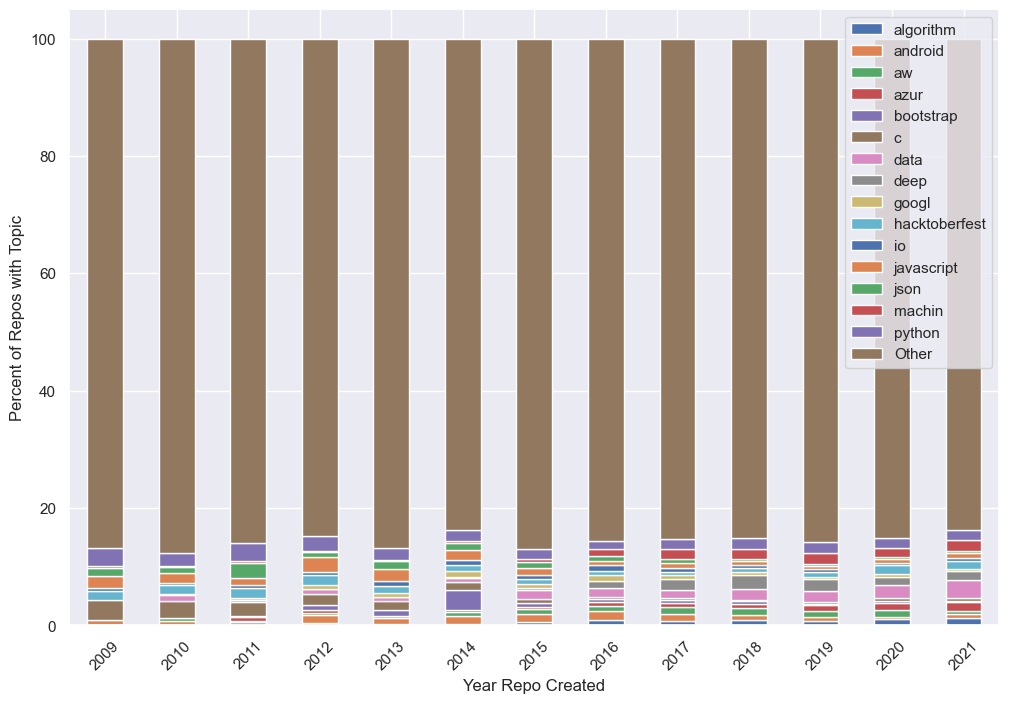

In [167]:
topic_by_year_percent.plot.bar(stacked=True)
plt.gcf().set_size_inches(12,8)
xt = plt.xticks(rotation=45)
plt.ylabel('Percent of Repos with Topic')
plt.xlabel('Year Repo Created')
plt.legend()
plt.show()

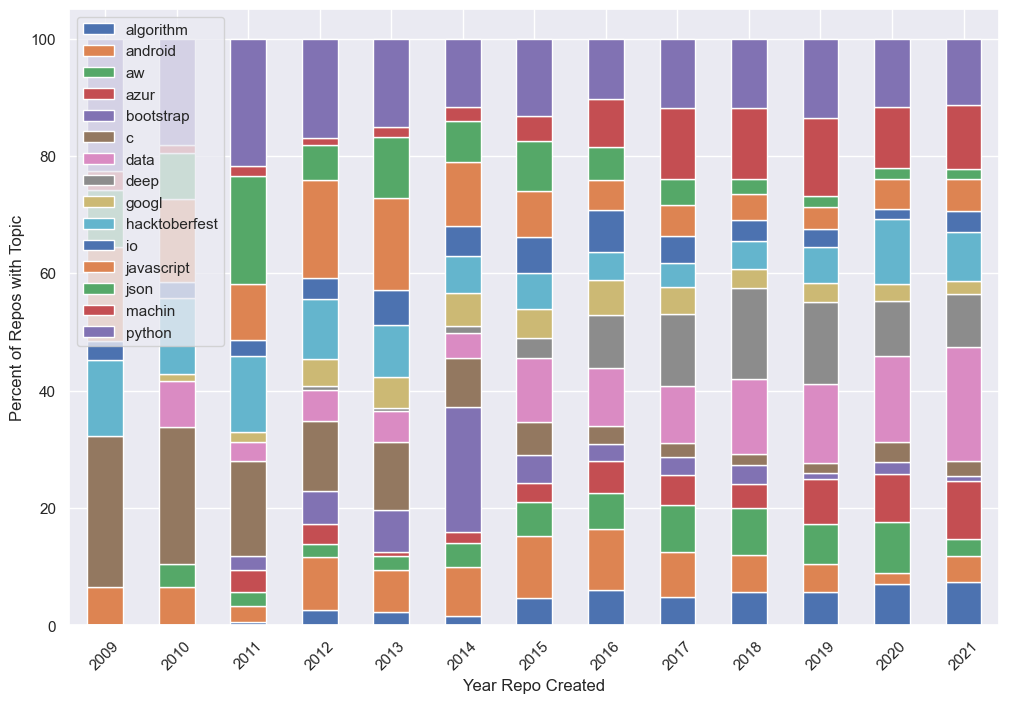

In [168]:
# discarding other because was a huge portion of topics
topic_by_year_dropped = topic_by_year.drop(columns=other_topics+['Other'])
topic_by_year_percent = topic_by_year_dropped.apply(lambda x: x*100/sum(x), axis=1)
topic_by_year_percent.plot.bar(stacked=True)
plt.gcf().set_size_inches(12,8)
xt = plt.xticks(rotation=45)
plt.ylabel('Percent of Repos with Topic')
plt.xlabel('Year Repo Created')
plt.legend()
plt.show()